<h1>Introduction of Dataset</h1>

The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

<h1>Objective</h1>

The task is to predict the quality of wine using the given data.

In [1]:
# Import necessary packages
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\\YBI Foundation\\Projects\\RedWhiteWineQuality.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<h2><i>Data Exploration</i></h2>

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
#Showing the total number of rows and columns
df.shape

(6497, 13)

<h2><i>Data Cleaning</i></h2>

In [7]:
# checking the null values in the dataset
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h4>Observation</h4><ul><li>There is no null value in the dataset.</ul>

In [8]:
# checking the duplicate values
df.duplicated().sum()

1177

In [9]:
df= df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

<h4>Observation</h4><ul><li>Checking for duplicates we see some duplicate values and remove it from the dataset.</ul>

In [11]:
# checking descriptive statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<h4>Observation</h4><ul><li>Describe function display all the descriptive statistical values of the dataset features.</ul>

<h2><i>Data Visualization</i></h2>

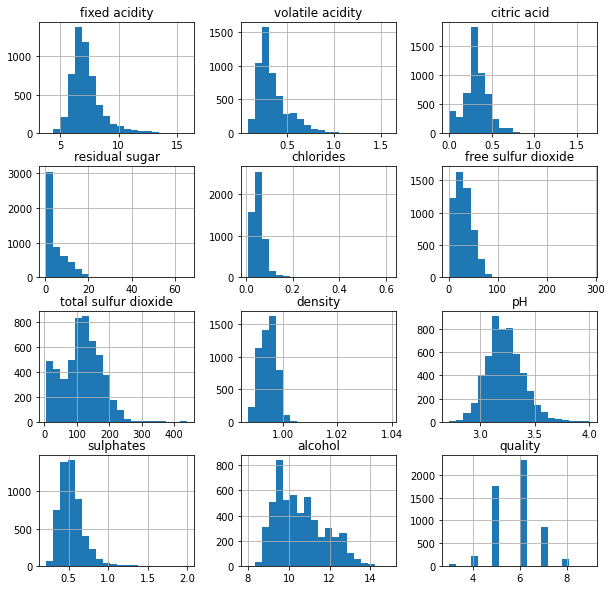

In [12]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

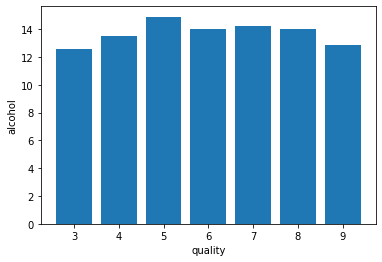

In [13]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

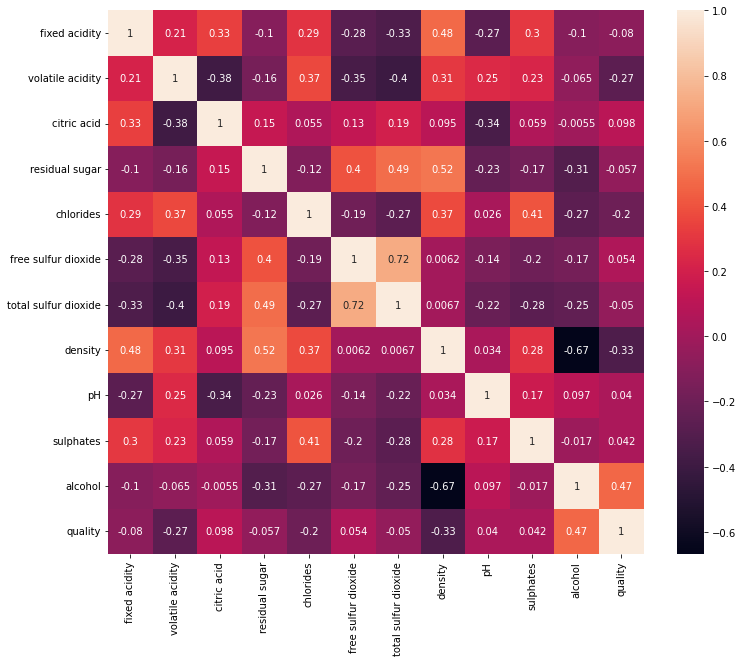

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cbar=True)
plt.show()

From the above heat map we can conclude that the ‘total sulphur dioxide’ and ‘free sulphur dioxide‘ are highly correlated features so, we will remove them.

In [15]:
df = df.drop('total sulfur dioxide', axis=1)

<h2><i>Data Preparation</i></h2>

In [16]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [17]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [18]:
X = df.drop(['quality','best quality'],axis=1)
Y = df['best quality']

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler()
X = sc_x.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42)

<h2><i>Data Modelling and Evaluation</i></h2>

In [21]:
from sklearn.metrics import accuracy_score,f1_score

In [22]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [23]:
pred_rf = rf.predict(X_test)

In [24]:
print("Accuracy Score: ",accuracy_score(Y_test,pred_rf)*100)
print("F1 Score: ",f1_score(Y_test,pred_rf,average = 'macro')*100)

Accuracy Score:  78.27067669172932
F1 Score:  76.50083298943862


In [25]:
# Support Vector Classifier

from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [26]:
pred_svc = svc.predict(X_test)

In [27]:
print("Accuracy Score: ",accuracy_score(Y_test,pred_svc)*100)
print("F1 Score: ",f1_score(Y_test,pred_svc,average = 'macro')*100)

Accuracy Score:  75.56390977443608
F1 Score:  73.35426772472877


In [28]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [29]:
pred_lr = lr.predict(X_test)

In [30]:
print("Accuracy Score: ",accuracy_score(Y_test,pred_lr)*100)
print("F1 Score: ",f1_score(Y_test,pred_lr,average = 'macro')*100)

Accuracy Score:  74.36090225563909
F1 Score:  71.85300482656454


# Wine Quality Prediction using Random Forest Model

In [ ]:
print("Enter the following details:")

wtype = int(input('Enter wine type (white(1)/red(0)): '))
fixed_acidity = float(input('Enter fixed acidity: '))
volatile_acidity = float(input('Enter volatile acidity: '))
citric_acid = float(input('Enter citric acid: '))
residual_sugar = float(input('Enter residual sugar: '))
chlorides = float(input('Enter chlorides: '))
free_sulfur_dioxide = float(input('Enter sulphur dioxide: '))
density = float(input('Enter density: '))
pH = float(input('Enter pH: '))
sulphates = float(input('Enter sulphates: '))
alcohol = float(input('Enter alcohol: '))

data = (wtype,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol)
data_array = np.asarray(data)
data_reshape = data_array.reshape(1, -1)
data_standard = sc_x.transform(data_reshape)
prediction = rf.predict(data_standard)

if(prediction[0] == 1):
    print('\nPrediction: Best wine quality')
else:
    print('\nPrediction: Low wine quality')

Enter the following details:
Enter wine type (white(1)/red(0)): 1
Enter fixed acidity: 6
Enter volatile acidity: 0.5
Enter citric acid: 0.4
Enter residual sugar: 4
Enter chlorides: 0.056
Enter sulphur dioxide: 29
Enter density: 1
Enter pH: 3.5
Enter sulphates: 0.78
